In [1]:
from time import time
from IPython.display import Image


# Stack examples
    - Storage of website addresses in internet web browsers
    - Undo button in text editors

# Stack: simplest of all data structures and one of the most important ones 
    - LIFO

In [2]:
class Empty(Exception):
    '''Error attempting to access an element from an empty container.'''
    pass
    

In [31]:
class ArrayStack:
    '''LIFO Stack implementation using a Python list as underlying storage.'''
    
    def __init__(self):
        self._data = []
        
    def __len__(self):
        return len(self._data)
    
    def is_empty(self):
        return len(self._data) == 0 
    
    def push(self,ele):
        return self._data.append(ele)
        
    def top(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data[-1]
    
    def pop(self):
        if self.is_empty():
            raise Empty('Stack is empty')
        return self._data.pop()

In [38]:
stack1 = ArrayStack()

In [57]:
stack1.push(1)
stack1.push(2)

In [58]:
stack1.top() , stack1.pop() , stack1.pop()

(2, 2, 1)

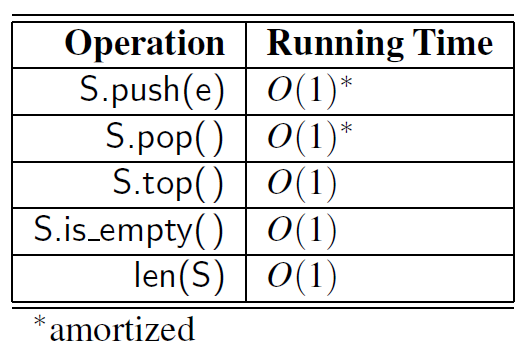

In [11]:
Image('ArrayStack Analysis.PNG')

### There can be an occasional O(n) for push and pop when the underlying list has to resize its internal array 

In [87]:
def reverse(filename):
    
    S = ArrayStack()
    with open(filename) as file: 
        for line in file: 
            S.push(line.strip('\n'))

    with open(filename, 'w') as file:
        while not S.is_empty():
            file.write(S.pop() + '\n')
            
filename = os.path.join(os.getcwd(), 'to_reverse.txt')   
reverse(filename)

In [93]:
name  = 'Behtash'
name.index('e')

1

# Matching delimeters : O(n)

In [122]:
correct  = '( )(( )){([( )])}'
wrong    = ')(( )){([( )])}'

In [123]:
def is_matched(expr):
    
    lefty  = '([{'
    righty = ')]}'
    
    S = ArrayStack()
    for c in expr :
        if c in lefty:
            S.push(c)
        elif c in righty: 
            if S.is_empty():
                return False
            if righty.index(c) != lefty.index(S.pop()) :
                return False
    return S.is_empty()


In [121]:
is_matched(wrong)

False

# Matching tags in HTML or XML : O(n)
    - To be completed 

# Queues: Fundamnental data structure 
    - FIFO
    - Examples: stores, theaters, reservation centers, calls to a customer service center , wait-list of a restaurant 
       - Printers also use FIFO queues 

In [125]:
lst = [0,1,2,3,4,5,6,7,8,9,10]
f = 0

In [138]:
f = (f+1) % len(lst)
f

1

# Circular array based implementation of queue

In [146]:
class ArrayQueue:

    default_cap = 10
    
    def __init__(self):
        self._data  = [None] * default_cap
        self._size  = 0
        self._front = 0
    
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]
    
    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._data[self._front]
        self._data[self._front] = None
        self._size -= 1
        self._front = (self._front + 1) % len(self._data) 
        return answer

    def enqueue(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        idx = (self._front + self._size) % len(self._data)
        self._data[idx] = e
        self._size +=1
        
    def _resize(self, cap):
        
        old = self._data
        self._data = [None] * cap
        
        idx = self._front
        for i in range(self._size):
            self._data[i] = old[idx]
            idx = (idx + 1) % len(old)
            
        self._front = 0
        

# Circular array based implementation of deque

In [145]:
class ArrayDeque:

    default_cap = 10
    
    def __init__(self):
        self._data  = [None] * default_cap
        self._size  = 0
        self._front = 0
        
    
    def __len__(self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def last(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front + self._size - 1]
    
    # --------------
    
    def delete_first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._data[self._front]
        self._data[self._front] = None
        self._size -= 1
        self._front = (self._front + 1) % len(self._data) 
        return answer

    
    def delete_last(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._data[self._front + self._size - 1]
        self._data[self._front + self._size - 1] = None
        self._size -= 1
        return answer    
    
    
    def add_last(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        idx = (self._front + self._size) % len(self._data)
        self._data[idx] = e
        self._size +=1
        
        
    def add_first(self,e):
        if self._size == len(self._data):
            self._resize(2*len(self._data))
        idx = (self._front - 1 ) % len(self._data)
        self._data[idx] = e
        self._size +=1    
    
        
    def _resize(self, cap):
        
        old = self._data
        self._data = [None] * cap
        
        idx = self._front
        for i in range(self._size):
            self._data[i] = old[idx]
            idx = (idx + 1) % len(old)
            
        self._front = 0
        